<center>

# Gauss-Newton으로 ols 추정

### 미분에 필요한 식은 다음과 같습니다.

</center>

$$
\begin{align}
\\
\quad 
& f(t_i,\beta) = \beta_1/(1+\exp(\beta_2+\beta_3t_i) \\
\\
& f_{\beta_1} = 1/ (1+\exp(\beta_2+\beta_3t_i)) \\
& f_{\beta_2} = -\beta_1\exp(\beta_2+\beta_3t_i)/(1+\exp(\beta_2+\beta_3t_i))^2 \\
& f_{\beta_3} =  -\beta_1t_i\exp(\beta_2+\beta_3t_i)/(1+\exp(\beta_2+\beta_3t_i))^2 \\
\\
\end{align}
$$

In [1]:
# 계산에 필요한 파이썬 라이브러리 import
import math
import numpy as np
from scipy.linalg import solve

In [2]:
#data t_i, year_i, population

t = list(range(1,23))
year = list(range(1790,2010,10))

population = np.array([3929,5308,7239,9638,12866,17069,23191,31443,39818,50155,62947,75994,
     91972,105710,122775,131669,151325,179323,203211,226542,248710,281422])

In [3]:
# t 는 1부터 22까지 입니다.
print(t)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


In [4]:
# year는 1790부터 2000까지 10 단위씩 입니다. 

print(year)

[1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]


In [5]:
#초기값 beta1, beta2, beta3 설정

Beta1 = 400
Beta2 = 4
Beta3 = -0.2

# population의 값을 1000으로 나누어 scaling 해줍니다. 

population = population/1000

B = []

B.append(np.array([[Beta1], [Beta2], [Beta3]]))
iter_num = 0

In [6]:
print(population)

[  3.929   5.308   7.239   9.638  12.866  17.069  23.191  31.443  39.818
  50.155  62.947  75.994  91.972 105.71  122.775 131.669 151.325 179.323
 203.211 226.542 248.71  281.422]


<center>
    
### 계산에는 다음과 같은 식을 사용하였습니다. 

</center>

$$
\begin{align}
\\
\quad 
&\{ \sum^n_{i} f_{\beta}(x_i,\beta^*)f^T_\beta(x_i,\beta^*)\}(\beta-\beta^*) = \sum^n_i \{y_i - f(x_i,\beta^*)\}f_\beta(x_i,\beta^*) 
\\
& f_{\beta_1} = 1/ (1+\exp(\beta_2+\beta_3t_i)) \\
& f_{\beta_2} = -\beta_1\exp(\beta_2+\beta_3t_i)/(1+\exp(\beta_2+\beta_3t_i))^2 \\
& f_{\beta_3} =  -\beta_1t_i\exp(\beta_2+\beta_3t_i)/(1+\exp(\beta_2+\beta_3t_i))^2 \\
\end{align}
$$


In [7]:
# k=0부터 100까지 반복합니다. (최대 iter 설정)
for k in range(0,100):
    iter_num += 1
    
    C1 = np.zeros((3,1))
    C2 = np.zeros((3,3))
    
    for i in range(len(t)):
        residual = population[i]-(B[k][0]/(1+math.exp(B[k][1]+(B[k][2]*t[i]))))
        
        f_round_b1 = 1/(1+math.exp(B[k][1]+(B[k][2]*t[i])))
        f_round_b2 = -B[k][0]*math.exp(B[k][1]+(B[k][2]*t[i]))/((1+math.exp(B[k][1]+(B[k][2]*t[i])))**2)
        f_round_b3 =-B[k][0]*t[i]*math.exp(B[k][1]+(B[k][2]*t[i]))/((1+math.exp(B[k][1]+(B[k][2]*t[i])))**2)
        
        f_round_beta = np.array([[f_round_b1],[f_round_b2],[f_round_b3]])
        
        C1 += residual*f_round_beta
        C2 += np.dot(f_round_beta, f_round_beta.T)
    
    inverse_matrix = np.linalg.inv(C2)
    K = np.dot(inverse_matrix, C1)

    new_Beta = B[k]+K

    B.append(new_Beta)

# #     # 새로운 Beta값들을 비교한 것중 최대값이 10e-8보다 작으면 수렴했다고 가정하고 루프를 멈춘다. 
    if max(abs(B[k+1]-B[k])/abs(B[k])) < 10e-8:
        print("break")
        break

# 반복수와 추정값 Beta는 다음과 같습니다.  
print("iter_num = ", iter_num)
print("Beta1 = ", B[k+1][0] )
print("Beta2 = ", B[k+1][1] )
print("Beta3 = ", B[k+1][2] )


break
iter_num =  8
Beta1 =  [444.27518855]
Beta2 =  [4.24798029]
Beta3 =  [-0.21518069]


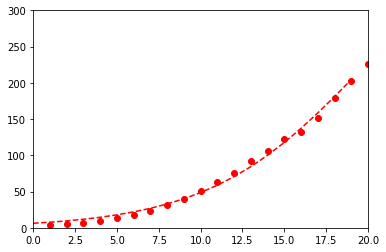

In [9]:
import matplotlib.pyplot as plt
plt.plot(t, population, 'ro')
plt.axis([0, 20, 0, 300])
x = np.arange(0,20,1)

plt.plot(x, (444.27518855/(1+ math.e **(4.24798029+( -0.21518069*x)))), 'r--')
plt.show()

In [1]:
for i in range(10):
    print(

0
1
2
3
4
5
6
7
8
9
